## data transformations

The regression functions we have explored take the following form,

$$
    p(y|X) \sim N(X\beta,\sigma^2).
$$

This is a flexible model able to make accurate predictions of many phenomena.
But this model does makes some important assumptions.
* L - Our response ($y$) is linearly related to $X$.
* I - The observations $(y_{i},x_{i})$ are independent from one another.
* N - The conditional probability of our response $y$ is normally distributed.
* E - The same $\sigma$ applies to all values of $X$, i.e. and distribution of errors have equal variance.


## when these assumptions fail

When our collected data fails to fit all the assumptions of linear regression we have two options: (i) pick a different, more complicated model or (ii) transform our original data so that the transformed data meet the above assumptions. 
We'll spend quite a bit of time on (i). 
For now, lets spend time on (ii).


### Exploratory Data Analysis

Suppose you're given X and Y data with the following relationship.

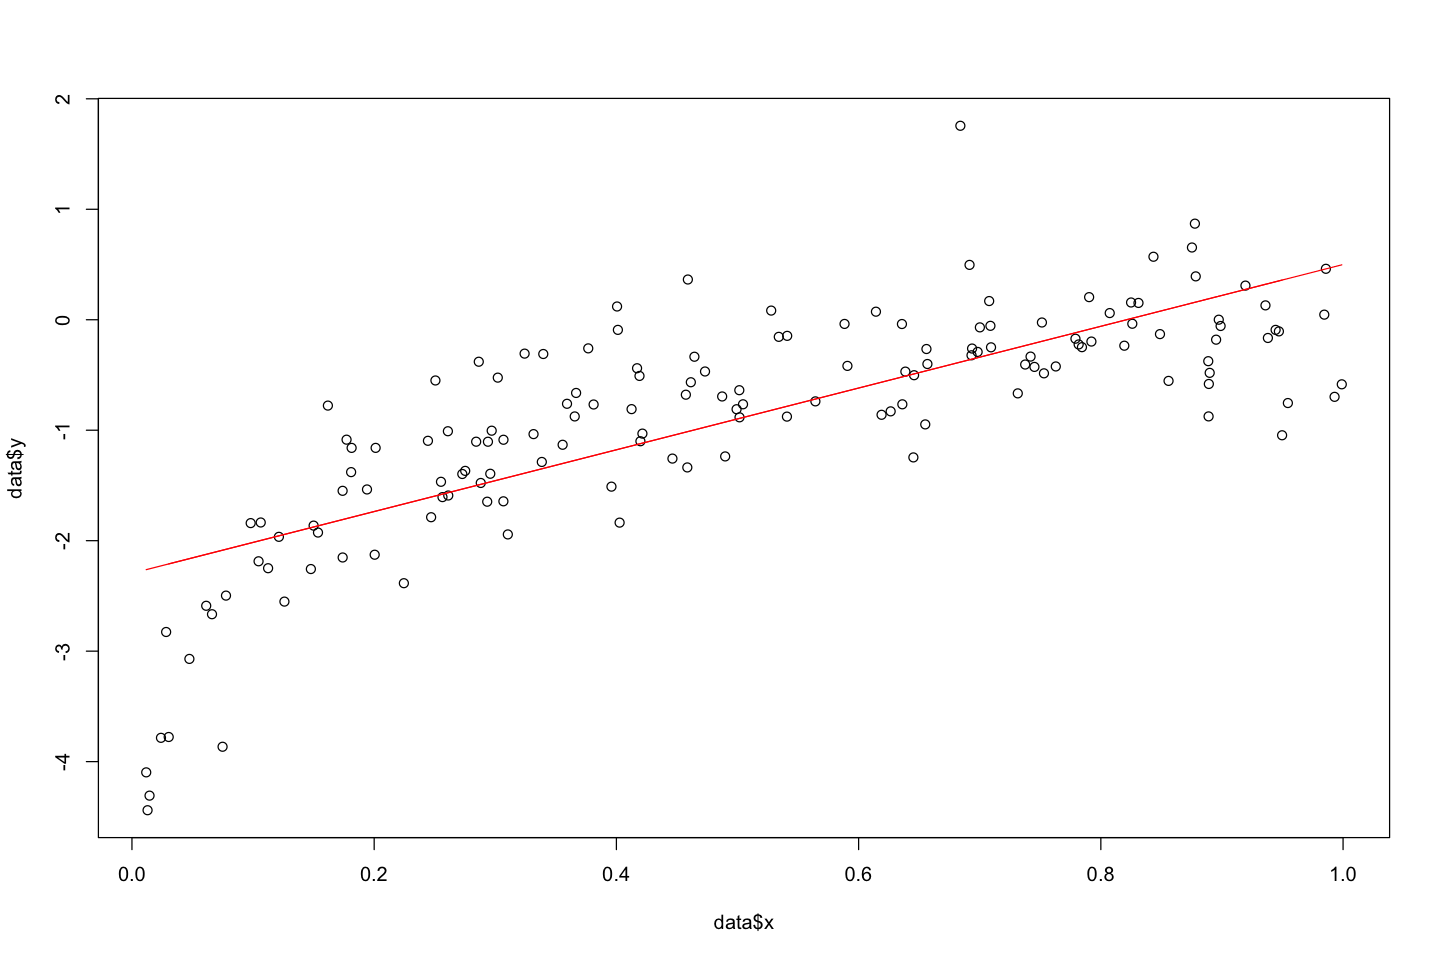

In [170]:
data <- read.csv("./dataSet1.csv")
plot(data$x,data$y)
model1 <- lm(y~x,data=data)
lines(data$x,predict.lm(model1,data.frame(x=data$x)),col='red')

The linear regression fits well for $x$ values great than 1/2 but over estimates $y$ values for $x$ values less than 1/2. 
The relationship between $x$ and $y$ appears non-linear. 
It breaks the **L** assumption.

We can explore transforms of $x$ so that the relationship between the transformed $x$ ($t = f(x)$) and $y$ is linear.
Common transformations applied to $x$ are: log transform, exp transform, and x raised to some power.
For our example, we will plot the $\log(x)$, $x^{1/2}$, $x^{1/3}$, and $x^{1/4}$ versus $y$. 

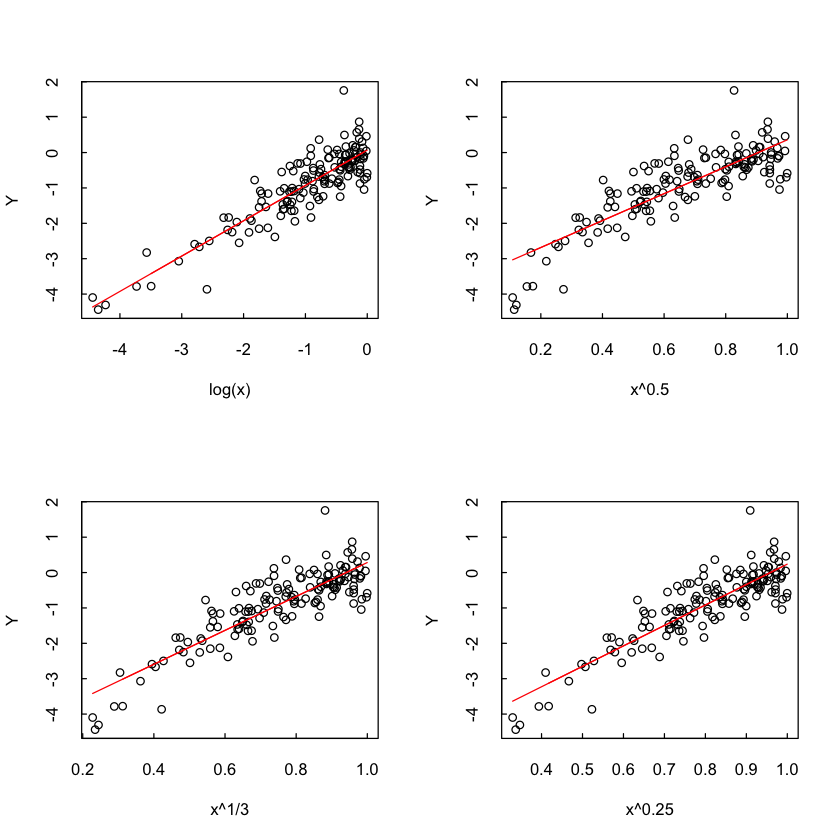

In [171]:
options(repr.plot.width=7*1, repr.plot.height=7)
par(mfrow=c(2,2))
transformedX = log(data$x)
plot(transformedX,data$y,xlab='log(x)',ylab='Y',tck = 0.02)
model <- lm(y~log(x),data=data)

predictions <- predict.lm(model,data.frame(x=data$x))
lines(transformedX
      ,predictions
      ,col='red')

transformedX = (data$x)^0.5
plot(data$x^0.5,data$y,xlab='x^0.5',ylab='Y',tck = 0.02)
model <- lm(y~I(x^0.5),data=data)

predictions <- predict.lm(model,data.frame(x=data$x))
lines(transformedX
      ,predictions
      ,col='red')

transformedX = (data$x)^0.333
plot(data$x^0.333,data$y,xlab='x^1/3',ylab='Y',tck = 0.02)
model <- lm(y~I(x^0.333),data=data)

predictions <- predict.lm(model,data.frame(x=data$x))
lines(transformedX
      ,predictions
      ,col='red')

transformedX = (data$x)^0.25
plot(data$x^0.25,data$y,xlab='x^0.25',ylab='Y',tck = 0.02)
model <- lm(y~I(x^0.25),data=data)

predictions <- predict.lm(model,data.frame(x=data$x))
lines(transformedX
      ,predictions
      ,col='red')

Any transformation above looks suitable. 
The relationship between the transformed $x$ variable and $y$ appears linear and
we would restore our **L** assumption.

To decide on a best transform, we can compare the distribution of the difference between our predictions $(\hat{y})$ and the truth $y$.
These differences are commonly defined as 

$$
\epsilon = y-\hat{y}
$$

These errors are sometimes called "residuals".
Below are four histograms corresponding to the errors for each of the above $x$ transformations.

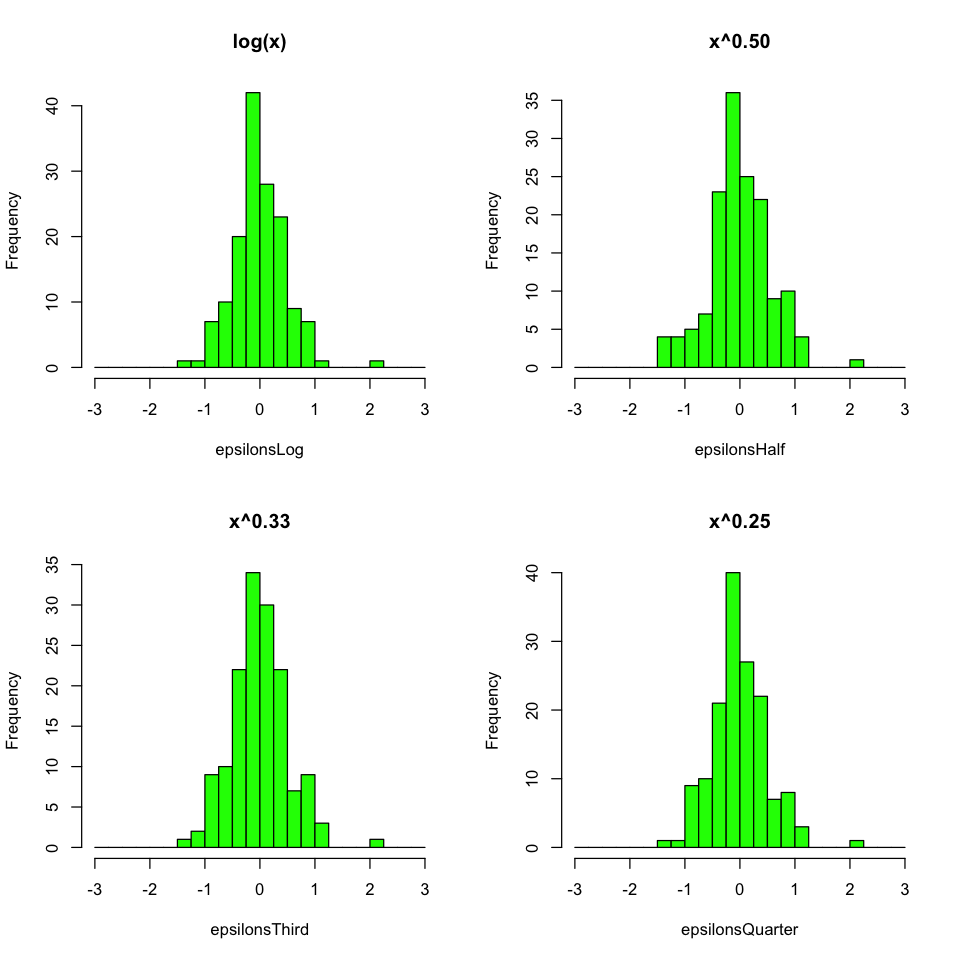

In [172]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))

modelLog <- lm(y~log(x),data=data)
epsilonsLog <- residuals(modelLog)
hist(epsilonsLog,breaks=seq(-3,3,0.25),col='green',,main="log(x)")

modelHalf <- lm(y~I(x^0.5),data=data)
epsilonsHalf <- residuals(modelHalf)
hist(epsilonsHalf,breaks=seq(-3,3,0.25),col='green',main="x^0.50")


modelThird <- lm(y~I(x^0.33),data=data)
epsilonsThird <- residuals(modelThird)
hist(epsilonsThird,breaks=seq(-3,3,0.25),col='green',main="x^0.33")


modelQuarter <- lm(y~I(x^0.25),data=data)
epsilonsQuarter <- residuals(modelQuarter)
hist(epsilonsQuarter,breaks=seq(-3,3,0.25),col='green',main="x^0.25")


The error distribution is very similar between all four transformations. 
All transformation's errors are between -2 and 2, and appear approximately symmetric around 0.
Comparing histograms is difficult. 
We can only give visual arguments for one transform over another.

## The Cumulative distribution function
Let $X$ be a random variable.

Define the cumulative distribution function (CDF) of $X$ as 

$$
    F_{X}(x) = P(X \leq x) = \int_{-\infty}^{x} f_{X}(x) \; dx
$$

where $f_{X}(x)$ is the the probability mass (density) function of $X$ 

$$
    f_{X}(x) = P(X = x).
$$

The cumulative distribution sums all the probability up to a desired value $x$.
The CDF is a non-decreasing and one-to-one function.

We can estimate the CDF from a sample of $N$ points $(x_{1},x_{2},\cdots,x_{N-1},x_{N})$.
The CDF at $x$ can be estimated as the fraction of points less than or equal to $x$.
Count the number of values less than or equal to $x$ and divide by the total number of points.


$$
F(x) = \frac{1}{N}\sum_{i=1}^{N} I( x_{i} \leq x)
$$

where the function $I(x)$ equals 1 when $x$ is true and $0$ when false.

If the CDF is a function that maps $x$ values to probabilities, then the inverse CDF must take as input a probability $p$ and returns the value such that the probability of that value or others less than that value equals $p$.


### Aside (CDF and pdf)
There is a relationship between the CDF of $X$ and probability mass (density) function.

\begin{align}
    \frac{dF}{dx} &= \lim_{h \to 0} \frac{F(x+h) - F(x)}{h}\\
                  &= \frac{\int_{x}^{x+h} f_{X}(x) \; dx}{h}\\
                  &\approx \frac{h \times f(x)}{h}\\
                  &= f(x)
\end{align}

The pdf and CDF are connected through differentiation.

## The QQ-plot

The Quantile-Quantile (QQ) plot is a visual method for comparing two distributions, but may make comparing tweo distributions easier to evaluate than plotting histograms.
The QQ plot is a parametric curve and built by plotting two distribution's inverse CDFs against one another.
If both distributions follow a similar law then the plot will look linear. 

Specify a set of probabilities $P$ to plot.

For every probability $p$ in $P$:
* compute $F_{X}^{-1}(p)$
* compute $F_{Y}^{-1}(p)$
* plot the pair $(F_{X}^{-1}(p),F_{Y}^{-1}(p))$

We can compare our sample distribution to a theoretical distribution, as long as we have the CDF for both the sample and theoretical distribution.
For example, if we want to compare our sampled distribution to a Normal distribution, we know the CDF for a normal distribution is

$$
    F(x;\mu,\sigma^{2}) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\frac{(x-\mu)^{2}}{2\sigma^2}}
$$

Lets look at an example of drawing a QQ-plot.
The sample is made up of 100 draws from a Normal distribution with mean 0 and standard deviation 4.

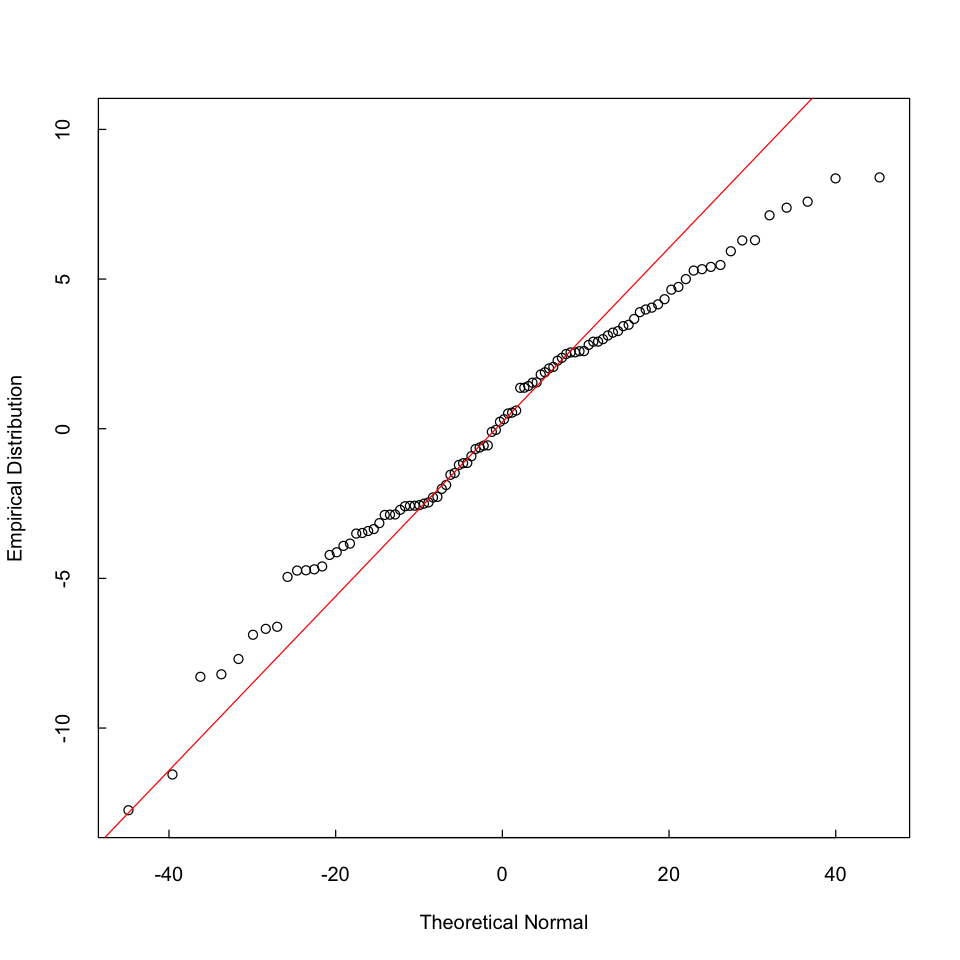

In [173]:
options(repr.plot.width=8*1, repr.plot.height=8)

normalSample <- rnorm(100,0,4)
varSample <- var(normalSample)
meanSample <- mean(normalSample)

probs <- seq(1,100,1)/100 # why did I choose this sequence of probs?

theoreticalNormals <- qnorm(probs,meanSample,varSample)  # this is the inverse CDF of a theoretical normal distribution

plot(theoreticalNormals,sort(normalSample)
     ,xlab='Theoretical Normal'
     ,ylab='Empirical Distribution'
     ,tck=0.01)

data <- data.frame("sample" =sort(normalSample), "theory"=theoreticalNormals) #why did I sort my sample????
model = lm(sample~theory,data=data[30:70,])
abline(model,col='red')

The curve above looks linear because the theoretical CDF and the sampled CDF have the same shape.



Lets look at two other sample distributions.

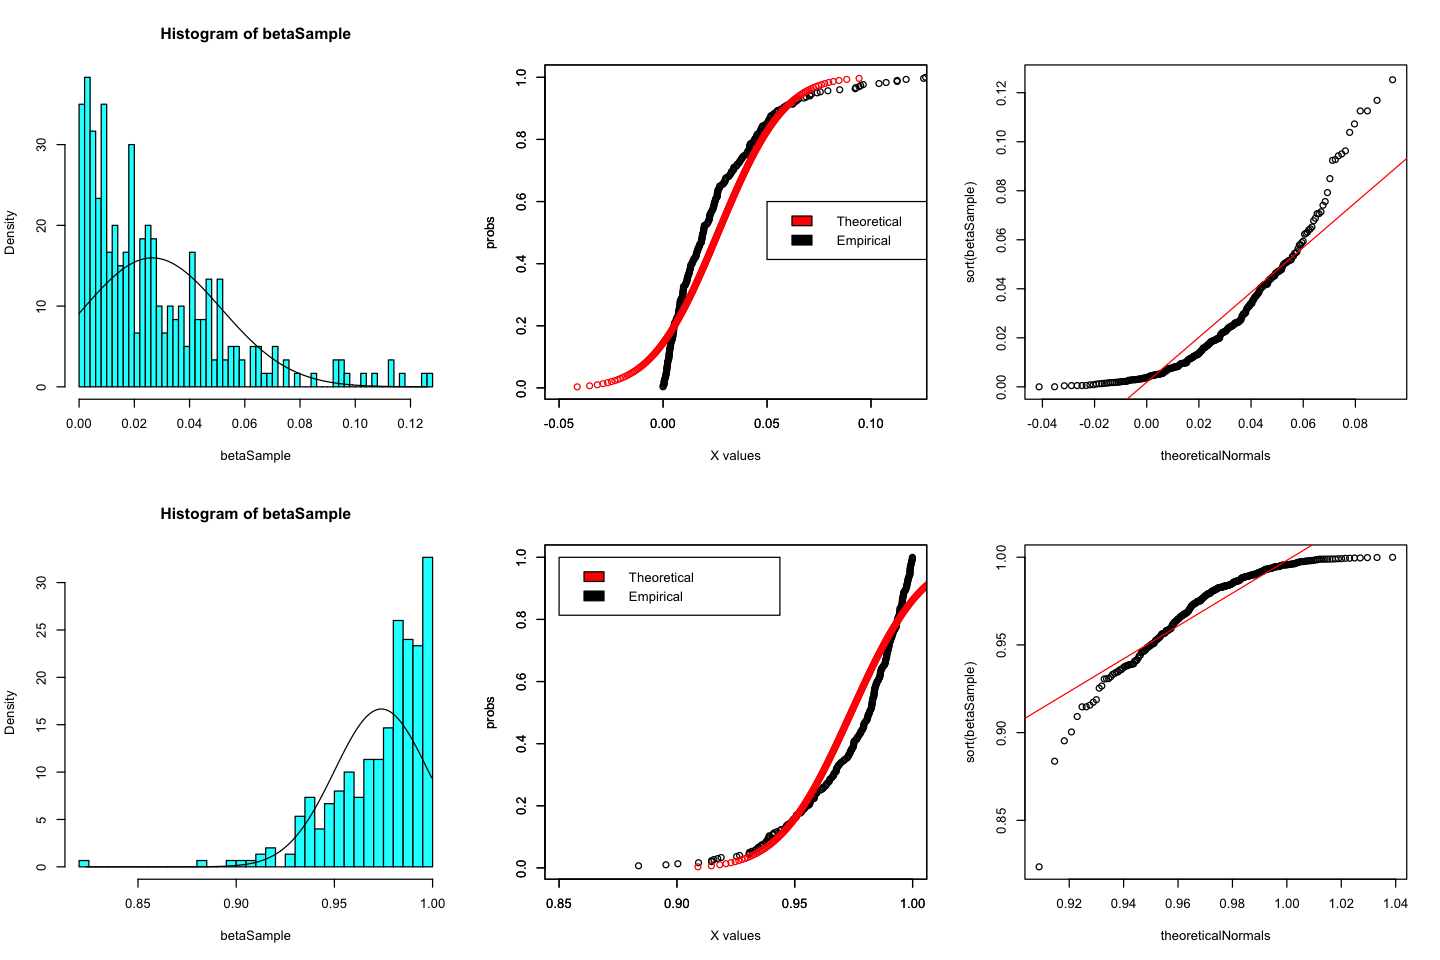

In [174]:
options(repr.plot.width=8*1.5, repr.plot.height=8)

nSamples = 300

betaSample <- rbeta(nSamples,1,40)
varSample <- var(betaSample)
meanSample <- mean(betaSample)

probs <- seq(1,nSamples,1)/nSamples # why did I choose this sequence of probs?

theoreticalNormals <- qnorm(probs)  # this is the inverse CDF of a theoretical normal distribution

par(mfrow=c(2,3))

#plot 1
hist(betaSample,50,col='cyan',probability=TRUE)

xs = seq(min(betaSample),max(betaSample),0.001)

mu = mean(betaSample)
sigma = sd(betaSample)
lines(xs,dnorm(xs,mu,sigma))

sortedBetaSamples <- sort(betaSample)
probs <- seq(1,nSamples,1)/nSamples
theoreticalNormals <- qnorm(probs,mu,sigma)  # this is the inverse CDF of a theoretical normal distribution

#plot 2
plot(sortedBetaSamples,probs,col='black',xlab='X values',xlim=c(-0.05,0.12))
par(new=TRUE)
plot(theoreticalNormals, probs,col='red',xlab='',xlim=c(-0.05,0.12))
legend(0.05,0.60,fill=c('red','black'),legend=c('Theoretical','Empirical'))

#plot 3
plot(theoreticalNormals,sort(betaSample))
data <- data.frame("sample" =sort(betaSample), "theory"=theoreticalNormals) #why did I sort my sample????
model = lm(sample~theory,data=data[1:nSamples-1,])
abline(model,col='red')

#-----------------------------------------------------------

betaSample <- rbeta(nSamples,40,1)
varSample <- var(betaSample)
meanSample <- mean(betaSample)

probs <- seq(1,nSamples,1)/nSamples # why did I choose this sequence of probs?

theoreticalNormals <- qnorm(probs)  # this is the inverse CDF of a theoretical normal distribution

#plot 1
hist(betaSample,50,col='cyan',probability=TRUE)

xs = seq(min(betaSample),max(betaSample),0.001)

mu = mean(betaSample)
sigma = sd(betaSample)
lines(xs,dnorm(xs,mu,sigma))

sortedBetaSamples <- sort(betaSample)
probs <- seq(1,nSamples,1)/nSamples
theoreticalNormals <- qnorm(probs,mu,sigma)  # this is the inverse CDF of a theoretical normal distribution

#plot 2
plot(sortedBetaSamples,probs,col='black',xlab='X values',xlim=c(0.85,1.0))
par(new=TRUE)
plot(theoreticalNormals, probs,col='red',xlab='',xlim=c(0.85,1.0))
legend(0.85,1.0,fill=c('red','black'),legend=c('Theoretical','Empirical'))


#plot 3
plot(theoreticalNormals,sort(betaSample))
data <- data.frame("sample" =sort(betaSample), "theory"=theoreticalNormals) #why did I sort my sample????
model = lm(sample~theory,data=data[1:nSamples-1,])
abline(model,col='red')



## Checking the normality of our residuals

Using a QQ-plot we can evaluate how well the distribution of our model errors fits a Normal distribution.

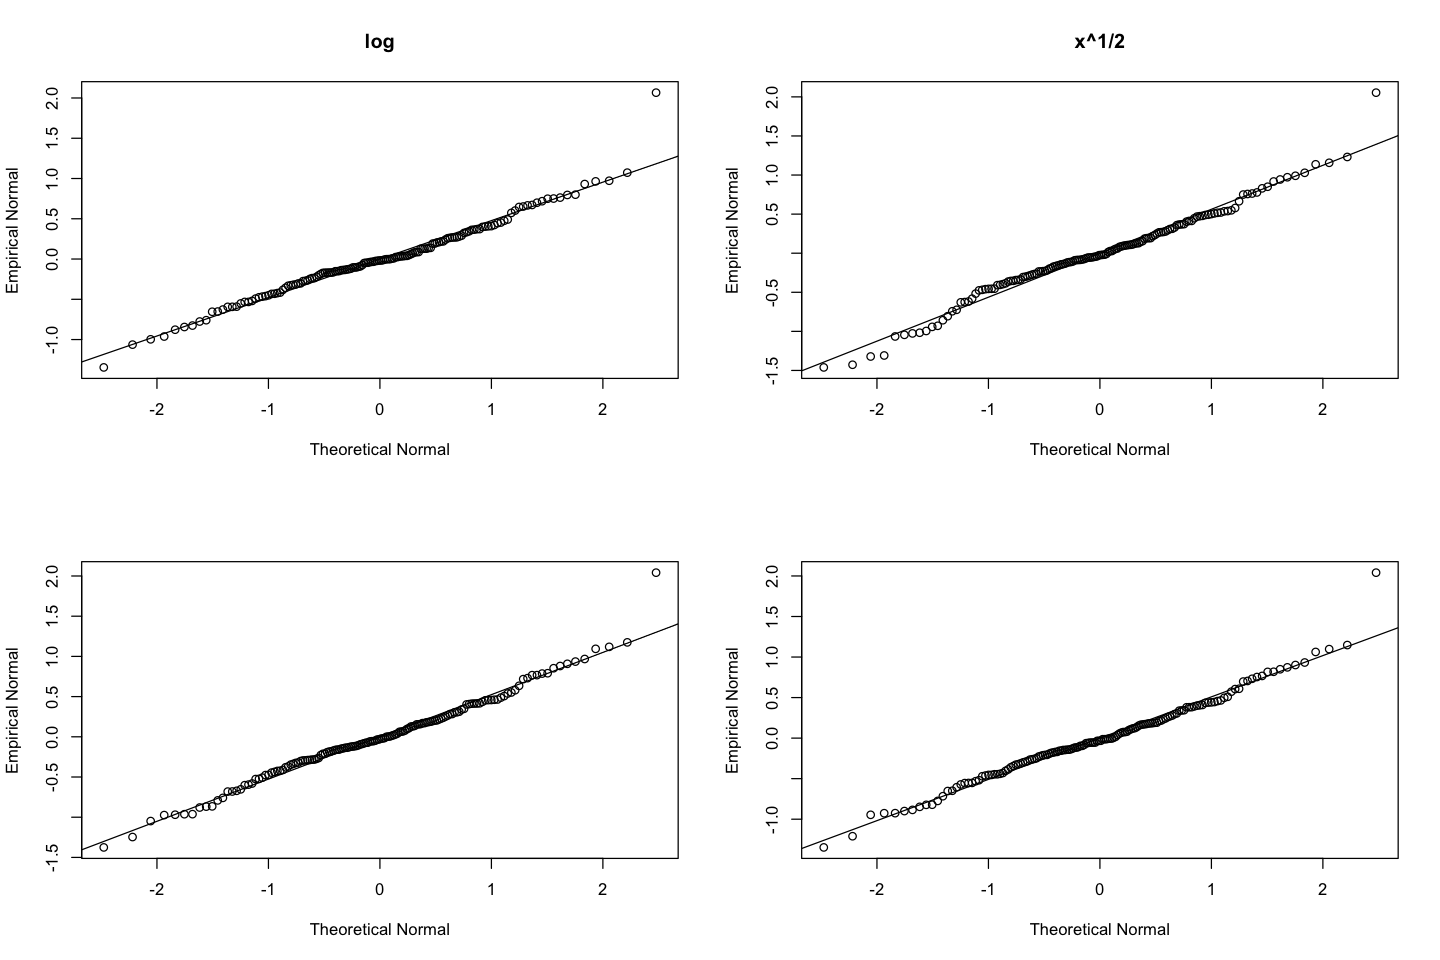

In [175]:
par(mfrow=c(2,2))

# plot 1
epsilonsLog = sort(epsilonsLog)
N = length(epsilonsLog)
probs = seq(1,N)/(N+1)
theoreticalNormal = qnorm(probs)

plot(theoreticalNormal,epsilonsLog
     ,xlab='Theoretical Normal'
     ,ylab='Empirical Normal')
abline(lm(epsilonsLog~theoreticalNormal))
title('log')


# plot 2
epsilonsHalf = sort(epsilonsHalf)
N = length(epsilonsHalf)
probs = seq(1,N)/(N+1)
theoreticalNormal = qnorm(probs)

plot(theoreticalNormal,epsilonsHalf
     ,xlab='Theoretical Normal'
     ,ylab='Empirical Normal')
abline(lm(epsilonsHalf~theoreticalNormal))
title('x^1/2')


# plot 1
epsilonsThird = sort(epsilonsThird)
N = length(epsilonsThird)
probs = seq(1,N)/(N+1)
theoreticalNormal = qnorm(probs)

plot(theoreticalNormal,epsilonsThird
     ,xlab='Theoretical Normal'
     ,ylab='Empirical Normal')
abline(lm(epsilonsThird~theoreticalNormal))


# plot 1
epsilonsQuarter = sort(epsilonsQuarter)
N = length(epsilonsQuarter)
probs = seq(1,N)/(N+1)
theoreticalNormal = qnorm(probs)

plot(theoreticalNormal,epsilonsQuarter
     ,xlab='Theoretical Normal'
     ,ylab='Empirical Normal')
abline(lm(epsilonsQuarter~theoreticalNormal))


All four transformations create residuals that follow an approximate Normal law.
It does appear that the square root transformation is the closest to Normal.
Any of the above transformations would not violate the **N** in LINE. 


## Equality of variance

The equality of variance condition requires that the residuals $\epsilon$ not depend on $x$. 
A scatter plot can visualize any dependencies between $x$ and $\epsilon$.

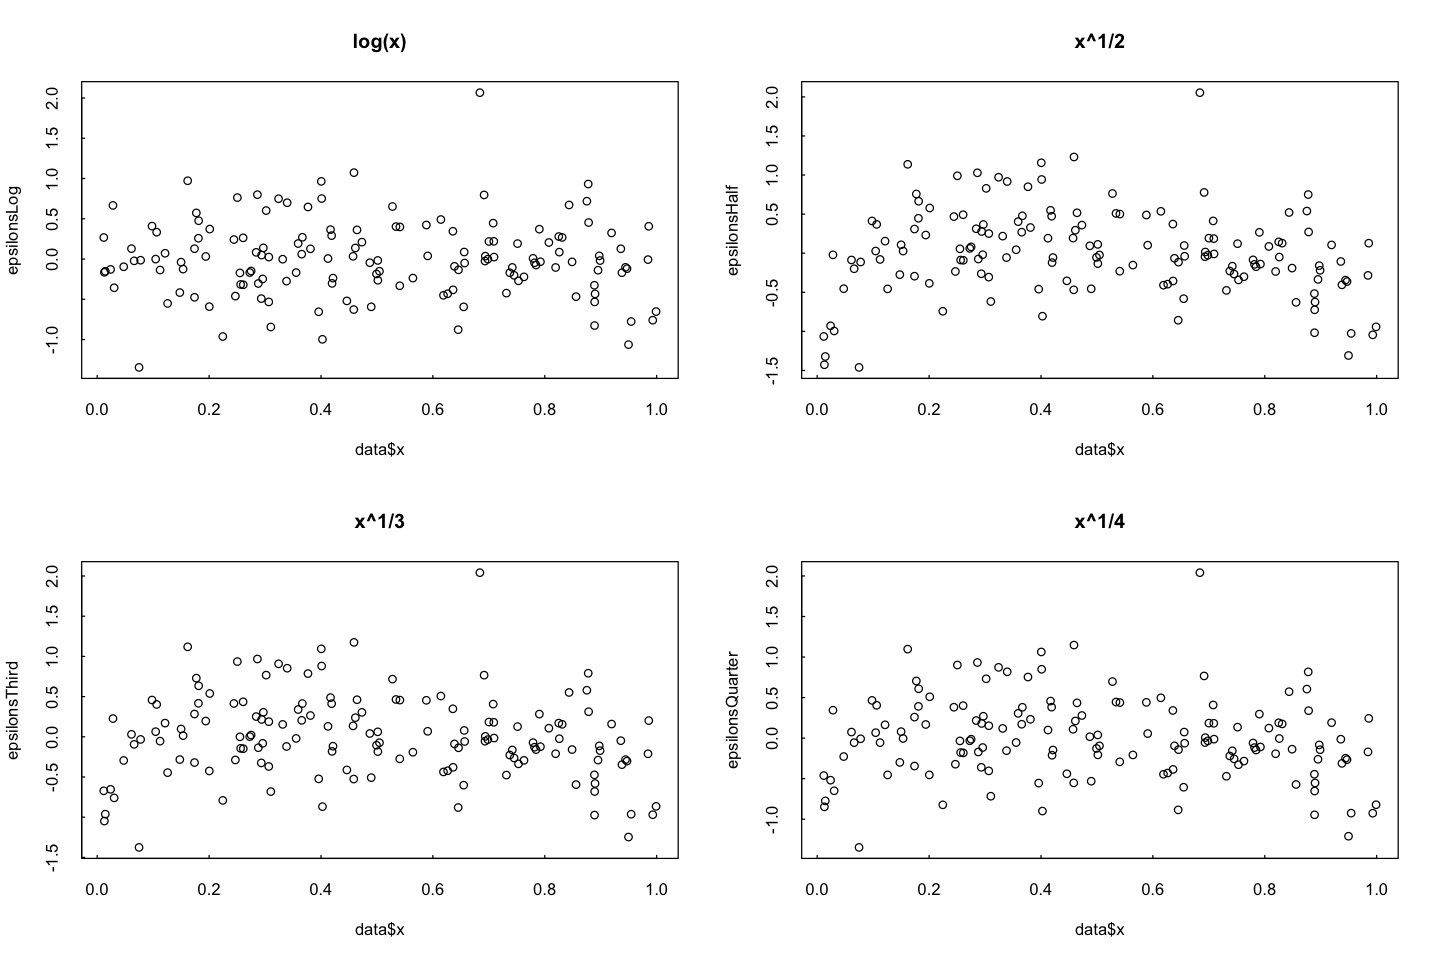

In [176]:
data <- read.csv("./dataSet1.csv")

par(mfrow=c(2,2))

# plot 1
modelLog <- lm(y~log(x),data=data)
epsilonsLog <- residuals(modelLog)

plot(data$x,epsilonsLog, tck=0.01)
title('log(x)')

# plot 2
modelHalf <- lm(y~I(x^0.5),data=data)
epsilonsHalf <- residuals(modelHalf)

plot(data$x,epsilonsHalf, tck=0.01)
title('x^1/2')

# plot 3
modelThird <- lm(y~I(x^0.33),data=data)
epsilonsThird <- residuals(modelThird)

plot(data$x,epsilonsThird, tck=0.01)
title('x^1/3')

# plot 4
modelQuarter <- lm(y~I(x^0.25),data=halfData)
epsilonsQuarter <- residuals(modelQuarter)

plot(data$x,epsilonsQuarter, tck=0.01)
title('x^1/4')

We see again all models create residuals that are centered at zero.
Log transforming $x$ appears to remove any relationship between $x$ and the relationships.
Power transforming $x$ looks like it encodes an almost slight quadratic relationship into the residuals.